in this session we will be answering the following questions:
1. what was the change in price in the stock over time ?
2. what was the daily return of a stock on average ?
3. what was the moving average of a stocks ?
4. what was the correlation between dirrerent socks' closing prices ?
5. how much vlalue do we put at risk by investing in a particular stock ?
6. how can we attempt to predict future stock begaviour ?

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from pandas_datareader import data

In [3]:
from datetime import datetime # this will be used to create the dates of period we need.

In [4]:
tech_list = ['AAPL' , 'GOOG' , 'MSFT' , 'AMZN'] # name of stocks we are going to pull information about them

In [5]:
end = datetime.now()
start = datetime(end.year -4 , end.month , end.day) # date from  4 years ago.


In [6]:
for stock in tech_list:
    globals()[stock] = data.DataReader(stock , 'yahoo' , start , end) 

In [7]:
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-04-25,36.224998,35.967499,35.977501,36.132500,75486000.0,34.317619
2017-04-26,36.150002,35.845001,36.117500,35.919998,80164800.0,34.115788
2017-04-27,36.040001,35.827499,35.980000,35.947498,56985200.0,34.141903
2017-04-28,36.075001,35.817501,36.022499,35.912498,83441600.0,34.108673
2017-05-01,36.799999,36.240002,36.275002,36.645000,134411600.0,34.804371
...,...,...,...,...,...,...
2021-04-19,135.470001,133.339996,133.509995,134.839996,94264200.0,134.839996
2021-04-20,135.529999,131.809998,135.020004,133.110001,94812300.0,133.110001
2021-04-21,133.750000,131.300003,132.360001,133.500000,68847100.0,133.500000


In [8]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1007 entries, 2017-04-25 to 2021-04-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1007 non-null   float64
 1   Low        1007 non-null   float64
 2   Open       1007 non-null   float64
 3   Close      1007 non-null   float64
 4   Volume     1007 non-null   float64
 5   Adj Close  1007 non-null   float64
dtypes: float64(6)
memory usage: 55.1 KB


1. the change in price of a stock during as time changes 

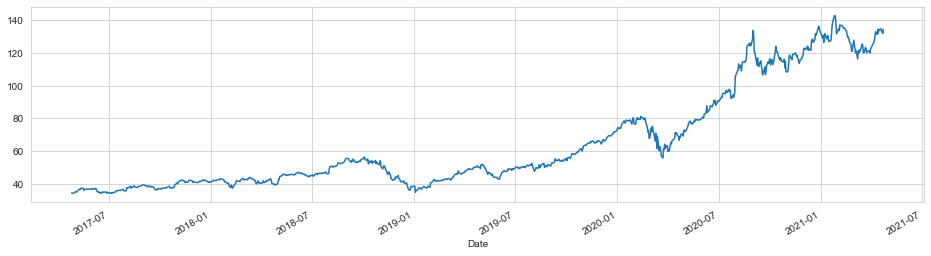

In [9]:
# we are going to use adj colose 
# if you ask why just read about it in the following link
# https://finance.zacks.com/adjusted-closing-price-vs-closing-price-9991.html
AAPL['Adj Close'].plot( figsize = (16 , 4))

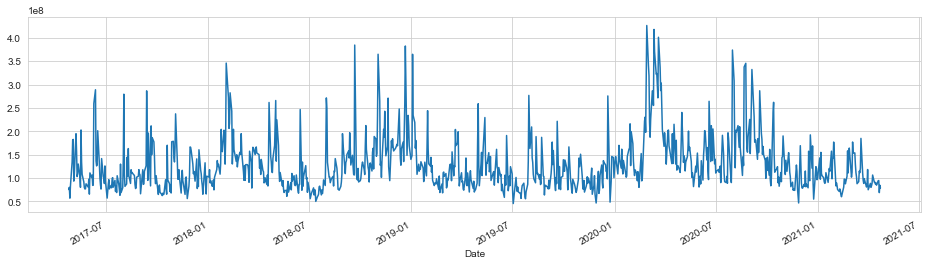

In [10]:
# what was the vlume of trades happened on each day for apple stock 
# notice the peacks and spikes this values in millions or even billions 0.0 WOW 
AAPL['Volume'].plot(figsize = (16 , 4)) 

 the moving average 


In [11]:
# the moving average is the average calculated for the last n days 
# for more read the article https://www.investopedia.com/terms/m/movingaverage.asp
ma_day = [10 , 20 , 50]

for ma in ma_day:
    column_name = "%s MA" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()
    

In [12]:
AAPL

,High,Low,Open,Close,Volume,Adj Close,10 MA,20 MA,50 MA
Date,,,,,,,,,
2017-04-25,36.224998,35.967499,35.977501,36.132500,75486000.0,34.317619,NaN,NaN,NaN
2017-04-26,36.150002,35.845001,36.117500,35.919998,80164800.0,34.115788,NaN,NaN,NaN
2017-04-27,36.040001,35.827499,35.980000,35.947498,56985200.0,34.141903,NaN,NaN,NaN
2017-04-28,36.075001,35.817501,36.022499,35.912498,83441600.0,34.108673,NaN,NaN,NaN
2017-05-01,36.799999,36.240002,36.275002,36.645000,134411600.0,34.804371,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-04-19,135.470001,133.339996,133.509995,134.839996,94264200.0,134.839996,131.867000,126.941500,126.5850
2021-04-20,135.529999,131.809998,135.020004,133.110001,94812300.0,133.110001,132.557000,127.427500,126.5120
2021-04-21,133.750000,131.300003,132.360001,133.500000,68847100.0,133.500000,133.117000,127.975500,126.4438


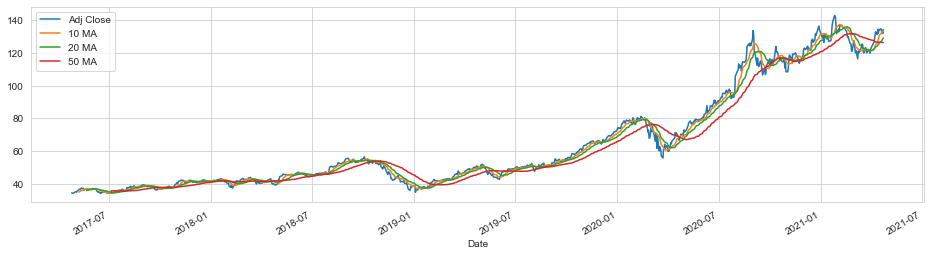

In [13]:
#Moving averages for apple
AAPL[['Adj Close','10 MA' , '20 MA' , '50 MA']].plot(figsize = (16 , 4))

the daily returns :
which means the precentage change in closing price of a stock

In [14]:
# daily returnes will be simply the percentage change for the previous day +ive  is profit  , -ive is loss
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

In [15]:
AAPL

,High,Low,Open,Close,Volume,Adj Close,10 MA,20 MA,50 MA,Daily Return
Date,,,,,,,,,,
2017-04-25,36.224998,35.967499,35.977501,36.132500,75486000.0,34.317619,NaN,NaN,NaN,NaN
2017-04-26,36.150002,35.845001,36.117500,35.919998,80164800.0,34.115788,NaN,NaN,NaN,-0.005881
2017-04-27,36.040001,35.827499,35.980000,35.947498,56985200.0,34.141903,NaN,NaN,NaN,0.000765
2017-04-28,36.075001,35.817501,36.022499,35.912498,83441600.0,34.108673,NaN,NaN,NaN,-0.000973
2017-05-01,36.799999,36.240002,36.275002,36.645000,134411600.0,34.804371,NaN,NaN,NaN,0.020397
...,...,...,...,...,...,...,...,...,...,...
2021-04-19,135.470001,133.339996,133.509995,134.839996,94264200.0,134.839996,131.867000,126.941500,126.5850,0.005069
2021-04-20,135.529999,131.809998,135.020004,133.110001,94812300.0,133.110001,132.557000,127.427500,126.5120,-0.012830
2021-04-21,133.750000,131.300003,132.360001,133.500000,68847100.0,133.500000,133.117000,127.975500,126.4438,0.002930


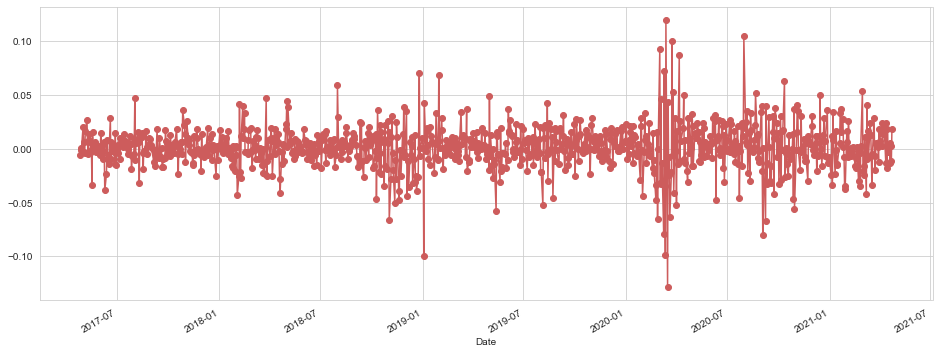

In [16]:
AAPL['Daily Return'].plot(figsize = (16 , 6) , marker = 'o' , color = 'indianred')

C:\Users\M.HASSAN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


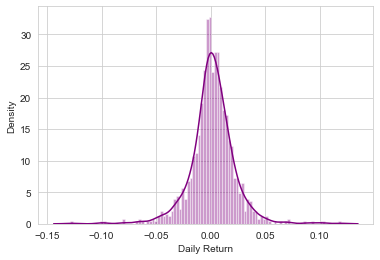

In [17]:
# lets check the daily returns disturbution for further imagining what was the change in prices

sns.distplot(AAPL['Daily Return'].dropna() , bins = 100 , color = 'purple' )

In [18]:
# we are going to make a data frame for the adjusted close prices for all the stocks we are interested in

In [19]:
# instead of passing every stock name each time .. pass a list of stocks names and only take the adjusted   close value
closing_df = data.DataReader(tech_list , 'yahoo' ,start , end )['Adj Close']

In [20]:
closing_df

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2017-04-25,34.317619,872.299988,63.918732,907.619995
2017-04-26,34.115788,871.729980,63.834030,909.289978
2017-04-27,34.141903,874.250000,64.248100,918.380005
2017-04-28,34.108673,905.960022,64.426910,924.989990
2017-05-01,34.804371,912.570007,65.320953,948.229980
...,...,...,...,...
2021-04-19,134.839996,2302.399902,258.739990,3372.010010
2021-04-20,133.110001,2293.629883,258.260010,3334.689941
2021-04-21,133.500000,2293.290039,260.579987,3362.020020


In [21]:
tech_returns = closing_df.pct_change()

In [22]:
tech_returns

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2017-04-25,NaN,NaN,NaN,NaN
2017-04-26,-0.005881,-0.000653,-0.001325,0.001840
2017-04-27,0.000765,0.002891,0.006487,0.009997
2017-04-28,-0.000973,0.036271,0.002783,0.007197
2017-05-01,0.020397,0.007296,0.013877,0.025125
...,...,...,...,...
2021-04-19,0.005069,0.002019,-0.007670,-0.008069
2021-04-20,-0.012830,-0.003809,-0.001855,-0.011068
2021-04-21,0.002930,-0.000148,0.008983,0.008196


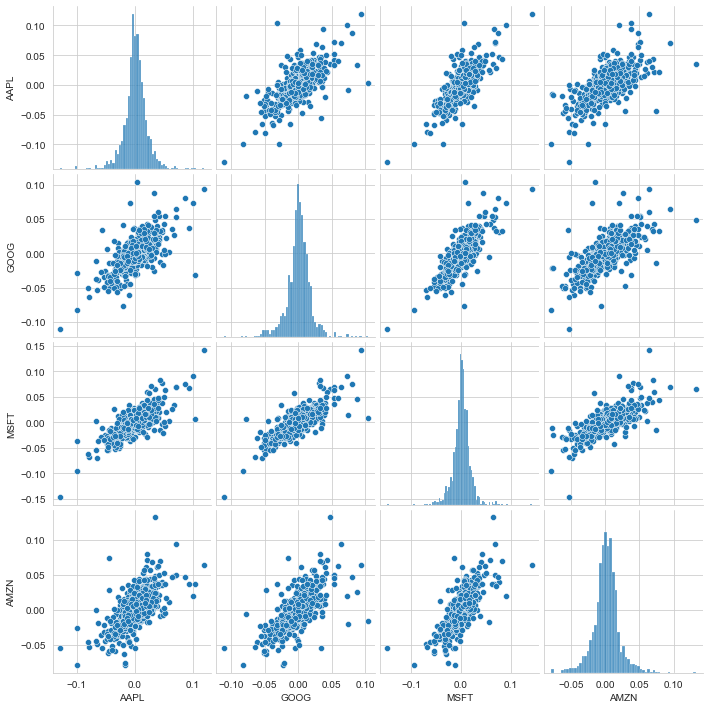

In [23]:
# this is if you want to get some insights of how stocks are correlated with each other
sns.pairplot(tech_returns.dropna())

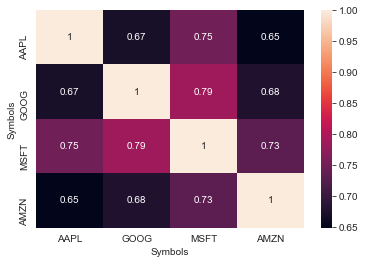

In [24]:
# but for real nothing is more staisify than using heat maps to discover correlation 
sns.heatmap(tech_returns.dropna().corr() , annot=True )

Rist managment

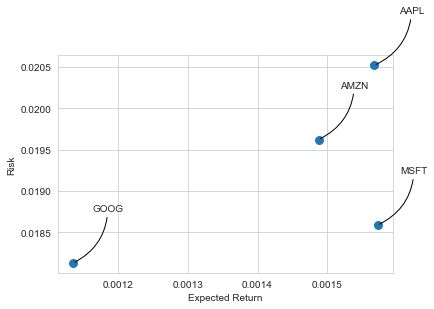

In [25]:
# risk measurement:
# one of the most used and simplest ways to analyze rist on a stock is by comparing the expected = returns mean() value by the risk = returns standard deviation

rets = tech_returns.dropna()

area = np.pi*20 # THIS WILL BE USED TO DEFINE THE AREA WHERE THE SCATTER PLOT WILL APPEAR OTHER WISE WE WANT BE ABLE TO SEE THEM

plt.scatter(rets.mean() , rets.std() , s = area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

# this only gonna be used for plottig antoations to see what point represents what
for label , x , y in zip(rets.columns , rets.mean() , rets.std()):
    plt.annotate(
        label , 
        xy = (x , y) ,
        xytext = (50 , 50),
        textcoords = 'offset points', ha = 'right' , va = 'bottom',
        arrowprops = dict(arrowstyle = '-' , connectionstyle = 'arc3,rad=-0.3' , color = 'black'))
    
    
# as you can see the one that gave lowest rist with the height expected value is Microsoft MSFT 
    